In [12]:
import numpy as np
import time
import pf_pytools.pf_fort_io as pf_fort_io
import pfio
import matplotlib.pyplot as plt
import xarray as xr

In [13]:
input_pfb = '/home/arezaii/git/tools/tests/press.init.pfb'

In [14]:
t2 = time.perf_counter()
pfb_c_data = pfio.pfread(input_pfb)
# Flip not needed with new PFIO code
# pfb_c_data = np.flip(pfb_c_data,axis=1)
t3 = time.perf_counter()
print(f'load time {t3-t2:0.4f} seconds')

load time 0.0008 seconds


In [15]:
t2 = time.perf_counter()
pfb_f_data = np.zeros((41,41,50), order='F')
pf_fort_io.pfb_read(pfb_f_data, input_pfb)
# X Y Z -> Z Y X
pfb_f_data = np.transpose(pfb_f_data,(2,1,0))
t3 = time.perf_counter()
print(f'load time {t3-t2:0.4f} seconds')

load time 0.0016 seconds


## Use numpy testing to make sure the data are all equal.

this function returns None if the arrays are exactly the same, otherwise an exception will be thrown.

In [16]:
np.testing.assert_array_equal(pfb_f_data, pfb_c_data)

## Prepare for plotting

Used xarray because it provides convenient plotting features

In [17]:
xds1 = xr.DataArray(pfb_c_data)
xds2 = xr.DataArray(pfb_f_data)

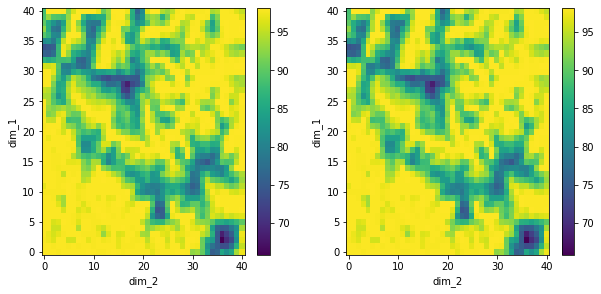

In [18]:
fig = plt.figure(figsize=[10, 10])
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
xds1[0,:,:].plot(ax=ax1)
xds2[0,:,:].plot(ax=ax2)

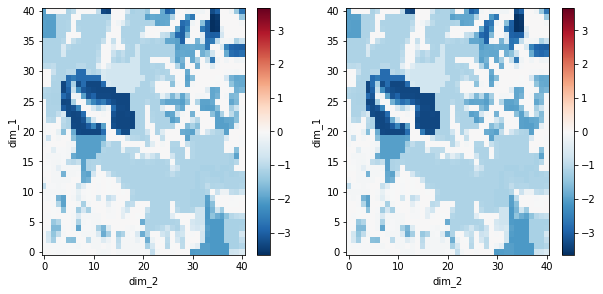

In [19]:
fig = plt.figure(figsize=[10, 10])
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
xds1[-1,:,:].plot(ax=ax1)
xds2[-1,:,:].plot(ax=ax2)

In [20]:
del(pfb_f_data)
del(pfb_c_data)

In [21]:
del(xds1)
del(xds2)

In [21]:
del(xds1)
del(xds2)